### Comparing Euphonic and Ab2tds

In [1]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

### Structure Factor Comparison

Note that only the raw unbinned structure factors are used in the Ab2tds comparison, because it is not possible to get the Ab2tds S(Q,w) without a resolution function applied, and therefore a fair comparison isn't possible with the binned S(Q,w).

#### Comparison Scripts

The `compare_sf` script can read structure factors from both Euphonic `StructureFactor` objects in a `.json` file, and Ab2tds structure factors written to a `alongthelineF.dat` file, and calculates the mean, min and max absolute/relative errors. It also applies a scaling factor, and sums the structure factors over degenerate modes. See the script for details on how it does this.

This scripts can be run for all the cuts for different materials to give an idea of how well they compare to experimental data.

#### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the Ab2tds structure factors with Euphonic's structure factors that have been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [7]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf2', '../../quartz/' + cut + '/euphonic/sf_phonons_100K.json',
                     '--sf1', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf2', '../../lzo/' + cut + '/euphonic/sf_phonons_300K.json',
                     '--sf1', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat'])

nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_phonons_100K.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_100K.dat'])


Results for ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json
Absolute Error - mean: 13.858751632327573 max: 26431.101711761206 min: 4.5997053101883975e-10
Relative Error - mean: 0.00357924835316781 max: 0.17076387967038384 min: 9.05466232264219e-07

Results for ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat ../../quartz/30L_qe/euphonic/sf_phonons_100K.json
Absolute Error - mean: 0.08020933473092452 max: 112.76437673470355 min: 2.563859167505067e-09
Relative Error - mean: 0.002005794499592873 max: 0.05626799935993283 min: 4.6427794933545003e-07

Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json
Absolute Error - mean: 1053.9194198838914 max: 1306158.4840825945 min: 3.966615993923373e-08
Relative Error - mean: 0.029974323613266532 max: 16.534866031761435 min: 1.2861905781270917e-05

Results for ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat ../../lzo/hh2_qe/euphon

The errors for the Quartz and Nb cuts are very small - showing mean relative errors of 0.2%, 0.4%, 0.3% and 0.2% respectively which is satisfactory.

However, the errors for LZO seem much higher - one mean error is 3%. But the overall relative errors might be giving a pessimistic picture of the comparison. Looking at the 300K `kagome_qe` data, we can look at which q-points are causing the largest relative error using the `-n` argument and take a closer look.

But the overall relative errors might be giving a pessimistic picture of the comparison. Looking at the 300K `kagome_qe` data again, we can look at which q-points are causing the largest relative error using the `-n` argument and take a closer look.

In [14]:
cut = 'kagome_qe'
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.7757479296516233e-05 max: 0.017682151071924612 min: 9.327695646695663e-16
Relative Error - mean: 0.02620542686745591 max: 3.7855021686834025 min: 1.3932887402783286e-06
Points with largest mean relative error: (array([79, 40, 80, 61, 39]), array([1, 0, 0, 0, 0]))


The q-point with the largest errors is 79 so lets look at that first with the `--qpts` argument


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.7757479296516233e-05 max: 0.017682151071924612 min: 9.327695646695663e-16
Relative Error - mean: 0.02620542686745591 max: 3.7855021686834025 min: 1.3932887402783286e-06


<IPython.core.display.Javascript object>


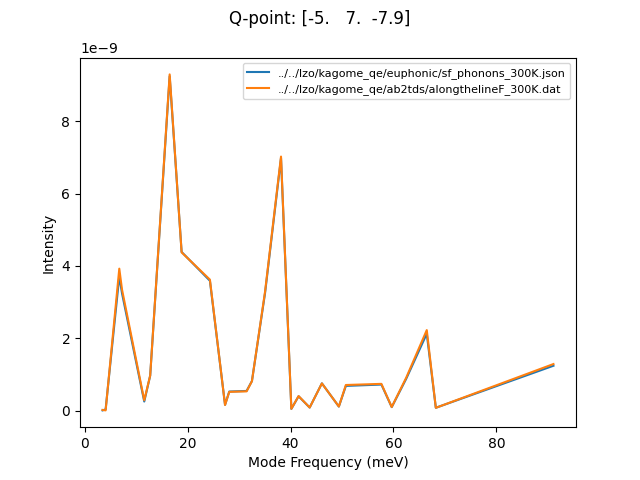

In [15]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '79'])

Overall the comparison between Euphonic and Ab2tds appears good, there are just 2 low-energy peaks that don't seem to compare well. There might be some sort of discrepancy between the population factor in Ab2tds and Euphonic, especially as there is floating point overflow when trying to perform Ab2tds calculations at low temperatures, which suggest the order of calculation may be slightly different. However, this discrepancy is only minor and only appears at certain q-points and modes.

Now lets look at the q-point with the second-highest error:


Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json
Absolute Error - mean: 1053.9194198838914 max: 1306158.4840825945 min: 3.966615993923373e-08
Relative Error - mean: 0.029974323613266532 max: 16.534866031761435 min: 1.2861905781270917e-05


<IPython.core.display.Javascript object>


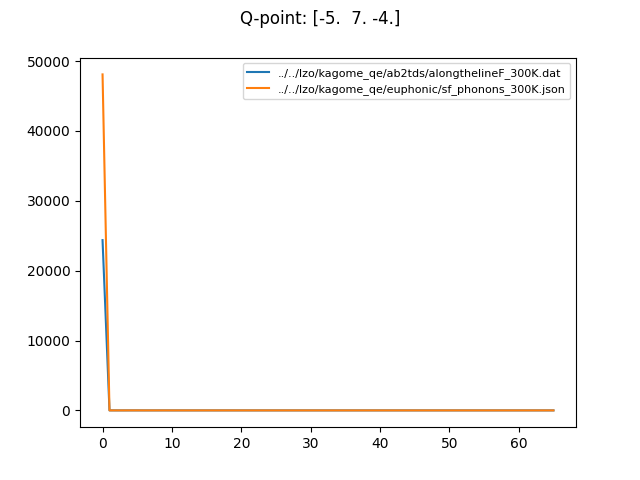

In [34]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf1', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40'])

This is a gamma point, and there is quite a large discrepancy in the Bragg peak, with the value calculated for Euphonic around 50% larger than with Ab2tds. However, the structure factor does include a 1/frequency term, which can have a large effect at small frequencies, particularly if there are rounding errors due to unit conversion. If you zoom in on the plot the other structure factors match quite well.

We can mask out the Bragg peaks by using the `--mask-bragg` argument and check q-point 40 again:


Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json
Absolute Error - mean: 0.0075922973921712265 max: 0.2604024845295285 min: 1.4063616430455946e-07
Relative Error - mean: 0.020286744770072702 max: 2.231480702375533 min: 9.95340558856042e-06


<IPython.core.display.Javascript object>


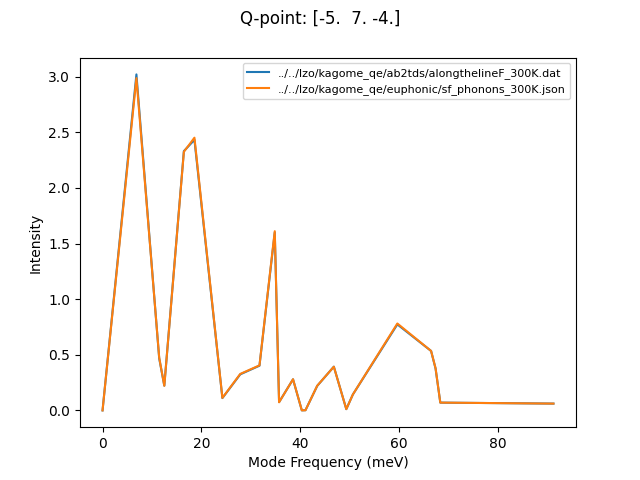

In [3]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf1', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40', '--mask-bragg'])

As a final sanity-check lets plot some of the highest-error points for quartz and Nb

**Quartz**

In [17]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat', '-n', '5'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 1.921862426185712e-06 max: 0.0027945067653171243 min: 1.5503682632537712e-18
Relative Error - mean: 0.014398287574396316 max: 0.2062721548639918 min: 3.92452364877589e-06
Points with largest mean relative error: (array([177,   5,  61,  67, 160]), array([ 1, 11,  1, 14,  0]))



Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 1.921862426185712e-06 max: 0.0027945067653171243 min: 1.5503682632537712e-18
Relative Error - mean: 0.014398287574396316 max: 0.2062721548639918 min: 3.92452364877589e-06


<IPython.core.display.Javascript object>


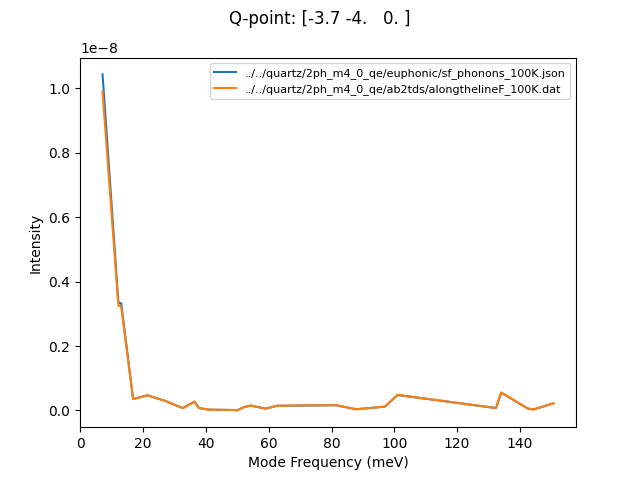

<IPython.core.display.Javascript object>


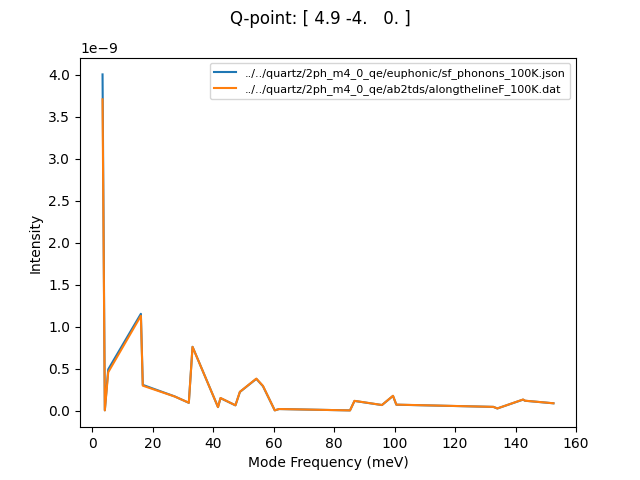

<IPython.core.display.Javascript object>


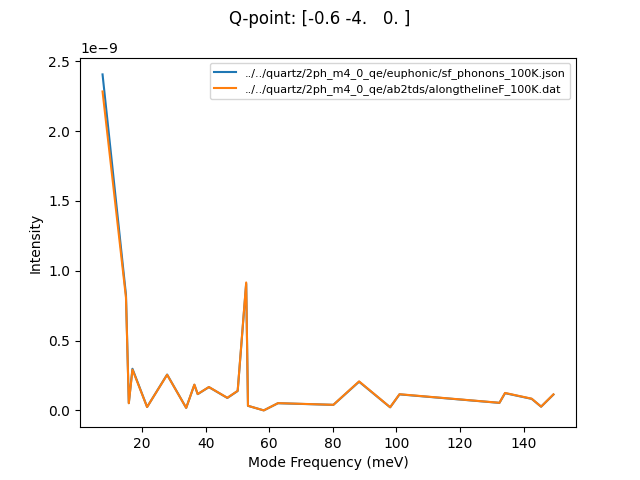

In [18]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat', '--qpts', '5,177,67'])

**Nb**

In [10]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../nb/m110_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../nb/m110_qe/ab2tds/alongthelineF_100K.dat', '-n', '5'])


Results for ../../nb/m110_qe/euphonic/sf_phonons_100K.json ../../nb/m110_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 3.654031768364109e-08 max: 4.202022250387322e-06 min: 1.3635387380106162e-17
Relative Error - mean: 0.00022522587222998454 max: 0.0004933822357992468 min: 6.308878652445589e-06
Points with largest mean relative error: (array([40, 40, 40, 39, 39]), array([2, 1, 0, 2, 1]))



Results for ../../nb/m110_qe/euphonic/sf_phonons_100K.json ../../nb/m110_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 3.654031768364109e-08 max: 4.202022250387322e-06 min: 1.3635387380106162e-17
Relative Error - mean: 0.00022522587222998454 max: 0.0004933822357992468 min: 6.308878652445589e-06


<IPython.core.display.Javascript object>


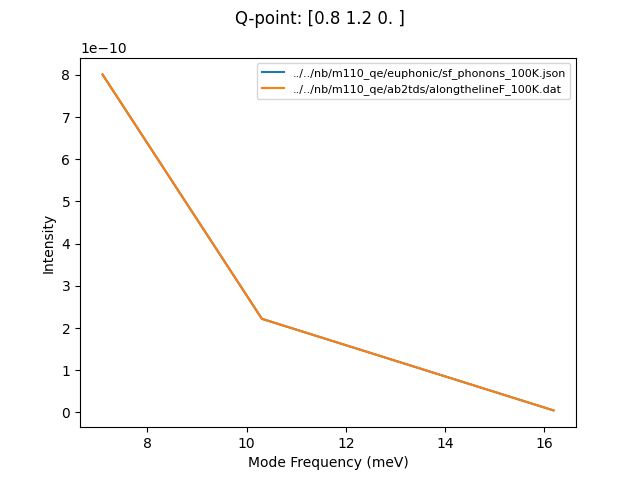

<IPython.core.display.Javascript object>


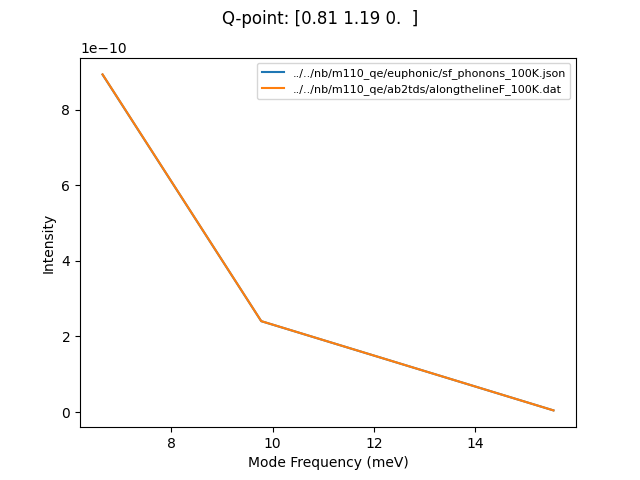

<IPython.core.display.Javascript object>


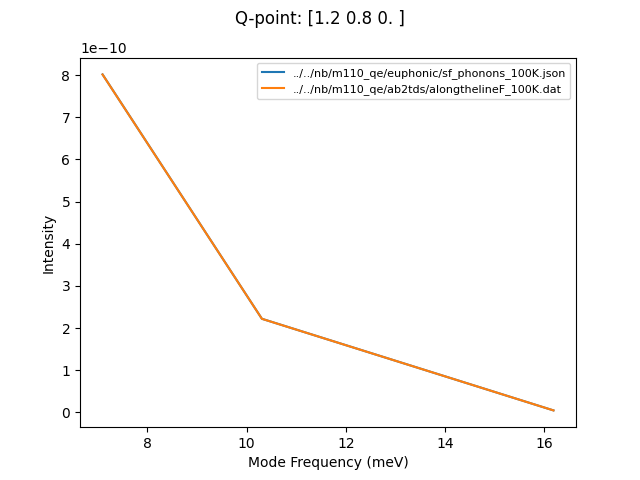

In [11]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../nb/m110_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../nb/m110_qe/ab2tds/alongthelineF_100K.dat', '--qpts', '40,39,0'])

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sf_phonons_100K.json` files contain Euphonic structure factors calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sf_fc_100K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [20]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 2.3469414920200564 max: 5413.8625713827705 min: 3.9255560222110435e-19
Relative Error - mean: 2.169318102038787 max: 909.5541304008842 min: 0.9950015410292632

Results for ../../quartz/30L_qe/euphonic/sf_fc_100K.json ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 0.022307183296400038 max: 31.56460302354719 min: 1.7215921519107588e-15
Relative Error - mean: 2.0274493650605954 max: 1357.6435149222339 min: 0.9686852719990601

Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 24489.577206051796 max: 31751576.821744416 min: 1.0476238210873612e-09
Relative Error - mean: 227.4535979865045 max: 619.6977288230237 min: 0.9999956532328843

Results for ../../lzo/hh2_qe/euphonic/sf_fc_300K.json ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat
Absolute Error 

Those errors are huge! Let's see what q-points are causing them:

In [21]:
cut = 'kagome_qe'
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 24489.577206051796 max: 31751576.821744416 min: 1.0476238210873612e-09
Relative Error - mean: 227.4535979865045 max: 619.6977288230237 min: 0.9999956532328843
Points with largest mean relative error: (array([ 0, 10, 20, 40, 30]), array([0, 0, 0, 0, 0]))



Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 24489.577206051796 max: 31751576.821744416 min: 1.0476238210873612e-09
Relative Error - mean: 227.4535979865045 max: 619.6977288230237 min: 0.9999956532328843


<IPython.core.display.Javascript object>


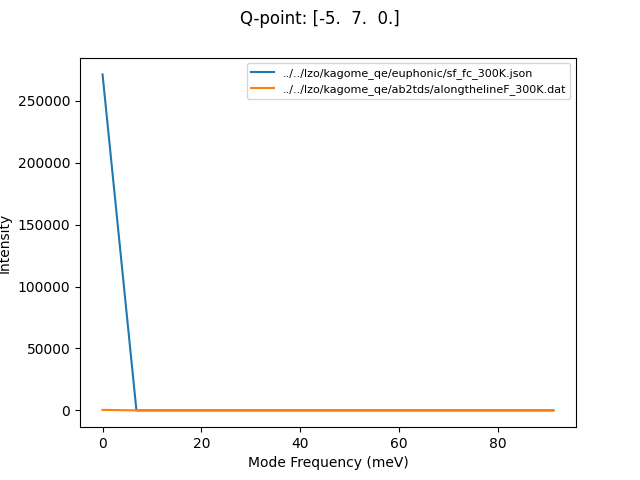

<IPython.core.display.Javascript object>


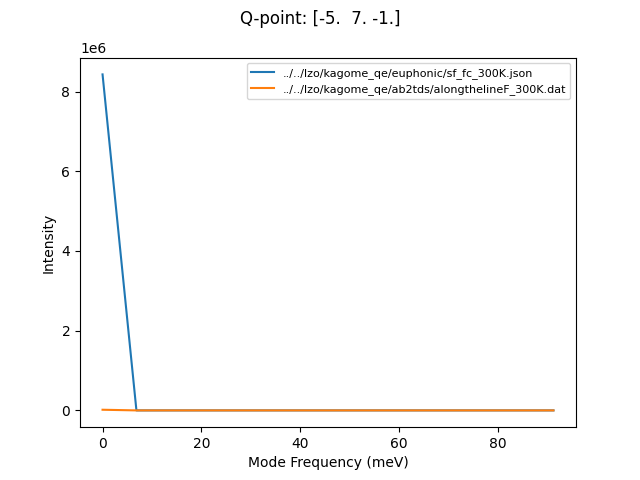

In [22]:
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '0,10'])

These are all gamma points, and the Bragg peaks are producing the huge errors. This is because the acoustic mode frequencies at gamma points when calculated with Euphonic are very close to zero (~1e-6 or less) because of the way the acoustic sum rule is implemented. Then due to the 1/frequency in the structure factor calculation, you are dividing by almost zero and the calculation is unstable. Therefore it isn't suitable to use Bragg peaks in the comparison.

To get a fairer comparison we can mask out the Bragg peaks using the `--mask-bragg` argument:

In [12]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf2', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf1', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf2', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf1', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])

nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 0.00018552937623063362 max: 0.0525838770537419 min: 1.1666069310421834e-10
Relative Error - mean: 0.0011311213489684129 max: 0.039692259803046435 min: 2.405927680510562e-07

Results for ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat ../../quartz/30L_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 0.001259201391609887 max: 0.5127072743387657 min: 1.3536227625959653e-09
Relative Error - mean: 0.0030658305303287027 max: 0.38183583971791585 min: 3.2959896255929165e-06

Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_fc_300K.json
Absolute Error - mean: 8.576076299454864e-05 max: 0.007655200159291553 min: 4.999364585506205e-09
Relative Error - mean: 0.00021579679552796133 max: 0.005314281560703497 min: 1.169914840633787e-07

Results for ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat ../../lzo/hh2_qe/eu

This actually somehow produces a better comparison than reading the frequencies directly from `.phonon`, with mean errors of only 0.1% and 0.3% for Quartz, 0.02% and 0.03% for LZO, and 1e-4% and 2e-4% for Nb.

Now lets look at the same q-point as we looked at before for the `kagome_qe` cut:


Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_fc_300K.json
Absolute Error - mean: 8.576076299454864e-05 max: 0.007655200159291553 min: 4.999364585506205e-09
Relative Error - mean: 0.00021579679552796133 max: 0.005314281560703497 min: 1.169914840633787e-07


<IPython.core.display.Javascript object>


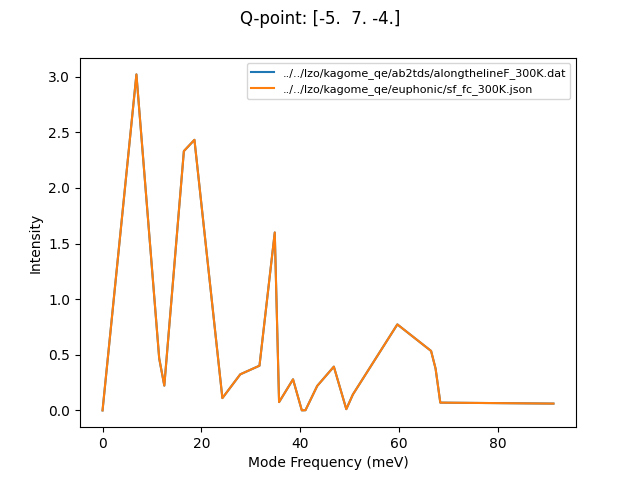

In [13]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf1', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40', '--mask-bragg'])

The discrepancy seen in the low-energy peaks is now gone! This demonstrates just how sensitive the structure factor is to floating point precision.

For a final check lets look at some random q-points from all the cuts


Results for ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 0.00018552937623063362 max: 0.0525838770537419 min: 1.1666069310421834e-10
Relative Error - mean: 0.0011311213489684129 max: 0.039692259803046435 min: 2.405927680510562e-07


<IPython.core.display.Javascript object>


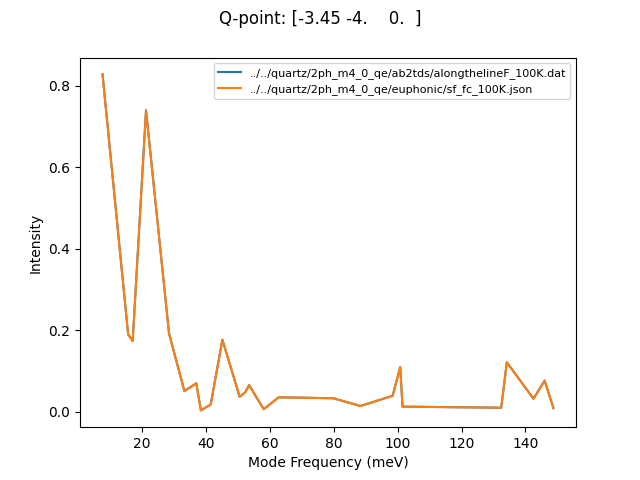

<IPython.core.display.Javascript object>


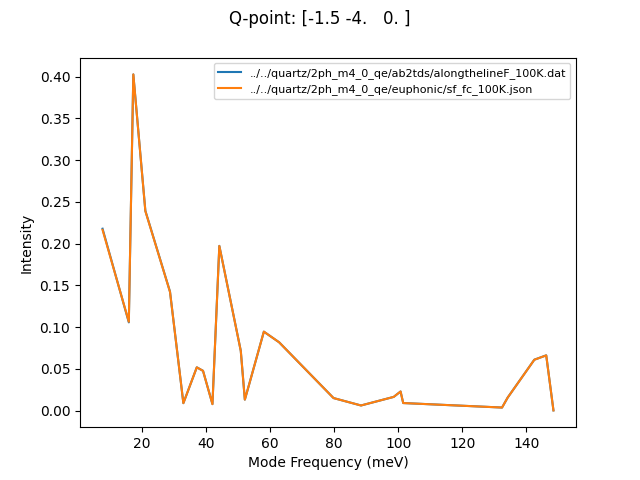


Results for ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat ../../quartz/30L_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 0.001259201391609887 max: 0.5127072743387657 min: 1.3536227625959653e-09
Relative Error - mean: 0.0030658305303287027 max: 0.38183583971791585 min: 3.2959896255929165e-06


<IPython.core.display.Javascript object>


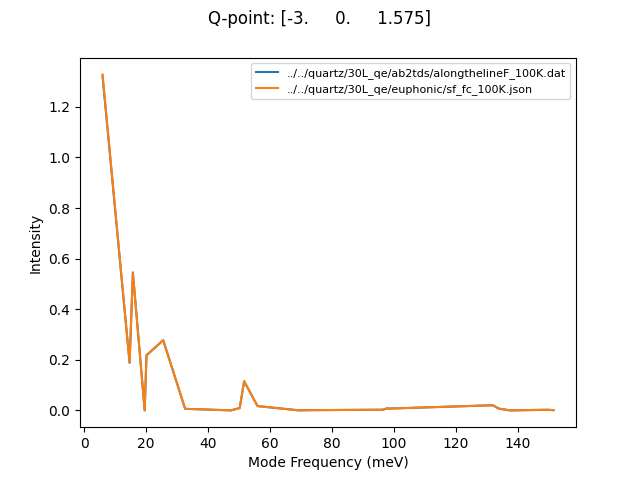

<IPython.core.display.Javascript object>


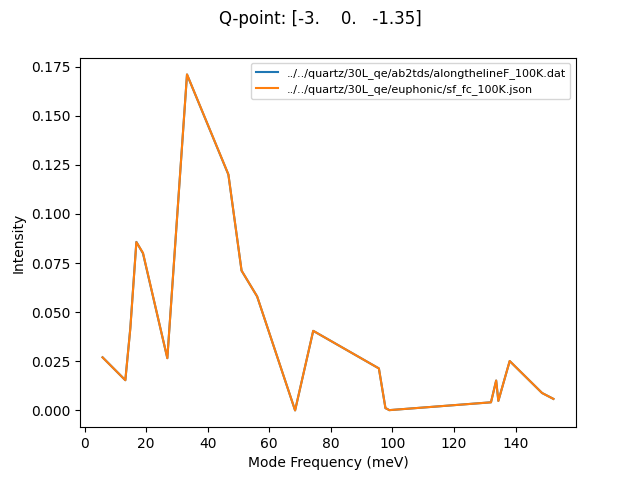


Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_fc_300K.json
Absolute Error - mean: 8.576076299454864e-05 max: 0.007655200159291553 min: 4.999364585506205e-09
Relative Error - mean: 0.00021579679552796133 max: 0.005314281560703497 min: 1.169914840633787e-07


<IPython.core.display.Javascript object>


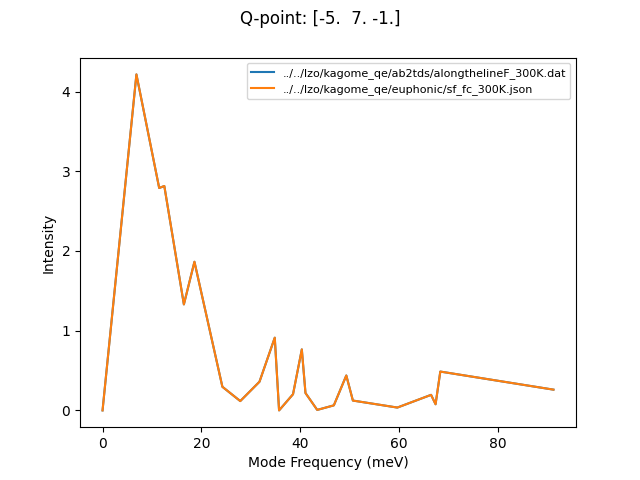

<IPython.core.display.Javascript object>


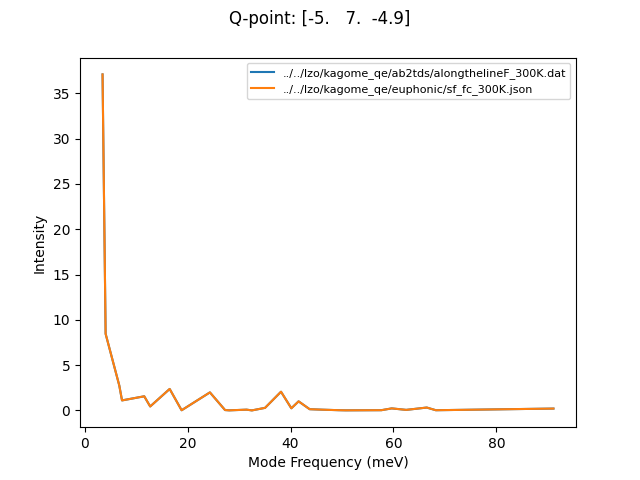


Results for ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat ../../lzo/hh2_qe/euphonic/sf_fc_300K.json
Absolute Error - mean: 0.00011232352412509207 max: 0.058782664486727754 min: 2.5458902314193536e-09
Relative Error - mean: 0.000311961356111127 max: 0.005622846454793782 min: 2.3254688908502855e-07


<IPython.core.display.Javascript object>


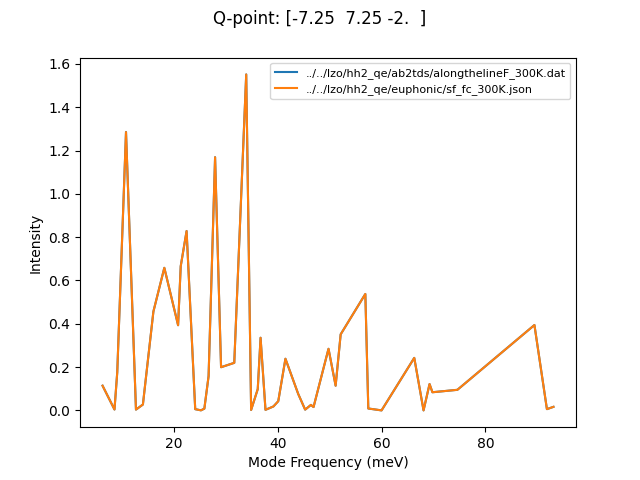

<IPython.core.display.Javascript object>


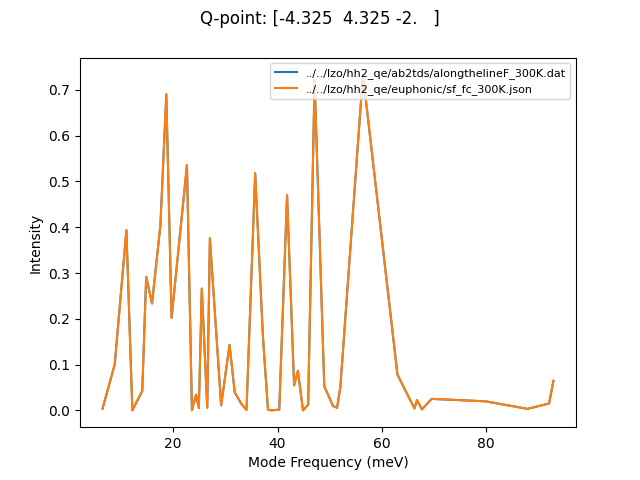


Results for ../../nb/110_qe/ab2tds/alongthelineF_100K.dat ../../nb/110_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 4.284436810550802e-07 max: 9.075365041688599e-06 min: 5.605616665294022e-12
Relative Error - mean: 1.1879140851772048e-06 max: 2.938934372930753e-06 min: 2.9997272940142714e-08


<IPython.core.display.Javascript object>


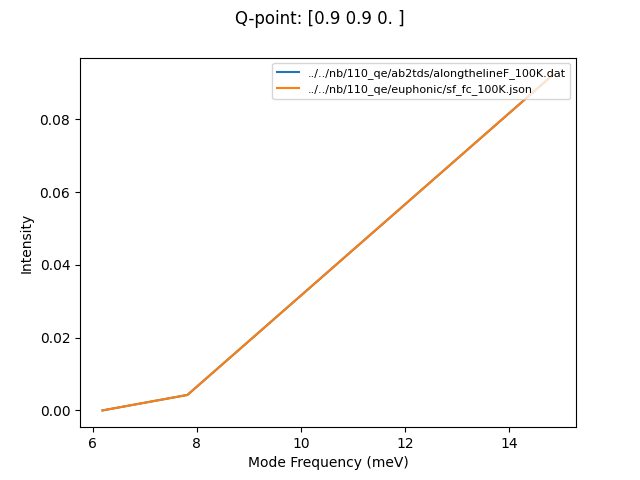

<IPython.core.display.Javascript object>


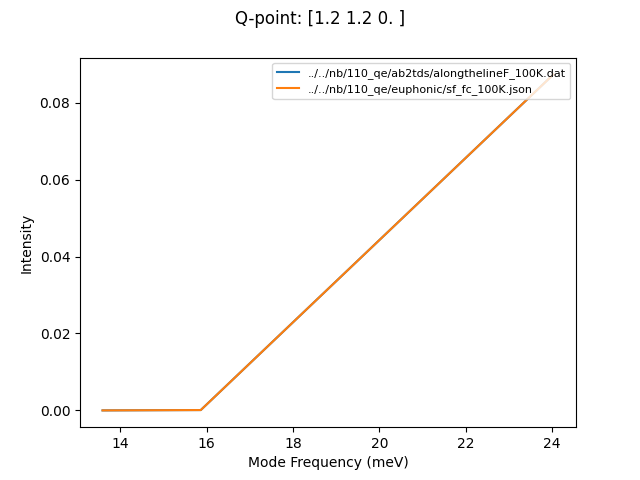


Results for ../../nb/m110_qe/ab2tds/alongthelineF_100K.dat ../../nb/m110_qe/euphonic/sf_fc_100K.json
Absolute Error - mean: 0.00011928621901470245 max: 0.006369933586853449 min: 3.894411919683205e-11
Relative Error - mean: 2.0969551692476757e-06 max: 4.280779218388437e-05 min: 3.531542342052277e-08


<IPython.core.display.Javascript object>


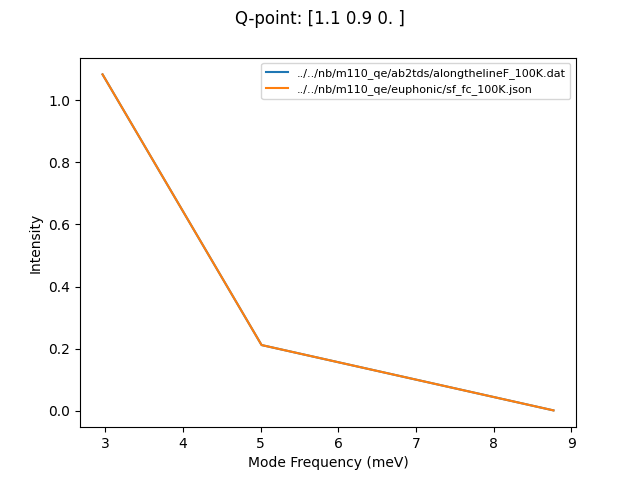

<IPython.core.display.Javascript object>


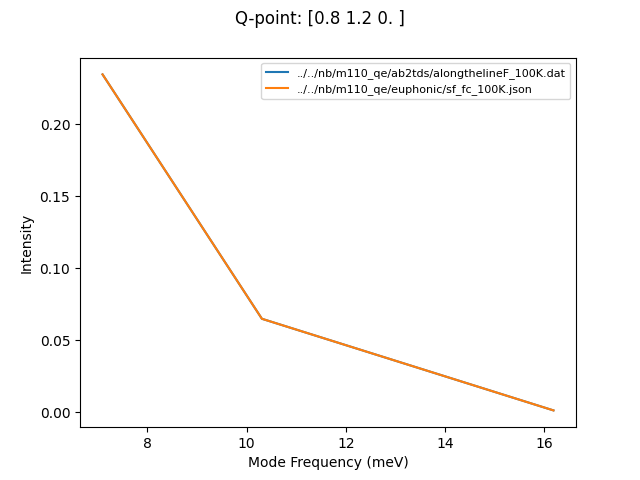

In [14]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf2', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf1', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg',
                     '--qpts', '10,49'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf2', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf1', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg',
                     '--qpts', '10,49'])

nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg',
                     '--qpts', '10,40'])

### Summary

Excellent agreement is achieved between the mode resolved structure factors of Euphonic and Ab2tds for frequencies read from a .phonon file for Quartz and Nb, with mean relative errors of 0.4% or less. The mean relative errors for LZO are higher, at 3%, but this has been determined to be likely due to rounding errors. For example, if the same LZO q-points are looked at with structure factors obtained from frequencies obtained by Euphonic's interpolation, the mean relative errors are reduced to 0.3% or less (ignoring Bragg peaks). This is surprising, as one would expect that errors are higher if different frequencies/eigenvectors are used. However, this supports the idea that there can be small differences in the result even if the same formulation is used. 